### generate_synthetic_principles_and_decisions.ipynb
This notebook generates an agents synthetic principles for use in HCVA
- Takes an individual agents value system
    - finds the decision they would take, and assigns the agent an ethical principle that fits with their view, or is the opposite of their view according to some probability $p$
    
**Note: To use this notebook you *must* have the set of all consensus value systems, and you must have generated decisions for or against for each consensus. This must then be inputted into the lists `for_scheme` and `against_scheme` respectively**
- Also note that to use the second half of this notebook (where the performance of each method is evaluated), you must have computed the HCVA point and the transition point

Following this, the notebook generates decisions that would be made

In [ ]:
import pandas as pd
import numpy as np

# As of 14/11, using processed_data_one_action_with_factor_2.5_5.0 P values 1.0-1.7 are for the scheme, 1.8 - 10.0 are against
against_scheme = list(np.arange(1.8, 10.0, 0.1))
for_scheme = list(np.arange(1.0, 1.7, 0.1))
against_scheme = [round(num, 1) for num in against_scheme]
for_scheme = [round(num, 1) for num in for_scheme]

# Read in data
agent_csv_file = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/processed_data_one_action_ess.csv_with_factor_2.5_5.0.csv"
df = pd.read_csv(agent_csv_file)
# sanity check
print(df.head())

   Unnamed: 0 country   rel  nonrel  a_div_rel  a_div_nonrel  Rel-Nonrel  \
0           0      AT   642    1216   0.238837      0.561952    0.731701   
1           1      BE   621    1116  -0.319377     -0.271804    0.713731   
2           2      CH   767     666   0.754020      1.000000    0.447139   
3           3      CZ   577    1483   0.106875      0.144976    0.829854   
4           4      DE  1264    1488   0.010549      0.340502    0.561047   

   Nonrel-Rel  
0    0.268299  
1    0.286269  
2    0.552861  
3    0.170146  
4    0.438953  


In [ ]:
def binary_principles(df):
    df['decision'] = np.nan  # Initialize the 'decision' column

    for index, row in df.iterrows():
        df.at[index, 'decision'] = (row['rel-nonrel'] * row['a_div_rel']) + (row['nonrel-rel'] * row['a_div_nonrel'])
        if df.at[index, 'decision'] < 0:
            df.at[index, 'egal'] = 1
            df.at[index, 'util'] = 0
        else:
            df.at[index, 'egal'] = 0
            df.at[index, 'util'] = 1
    return df

def range_principles(df):
    df['decision'] = np.nan  # Initialize the 'decision' column
    for index, row in df.iterrows():
        # note: against_scheme = 1.8 to 3.1
                # for_scheme = 1.0 to 1.7 and 3.2 to 10.0
        total_interviewees = row['rel'] + row['nonrel']

        df.at[index, 'decision'] = (row['Rel-Nonrel'] * row['a_div_rel']) + (row['Nonrel-Rel'] * row['a_div_nonrel'])
        if df.at[index, 'decision'] < 0:
            factor = np.random.choice(against_scheme)
            egal = (factor / 10) * total_interviewees
            util = total_interviewees - egal
            egal = round(egal, 0)
            util = round(util, 0)
            # Factor is 1.0 then [egal, util] = [0, 1]
            # Factor is 10.0 then [egal, util] = [1, 0]
            # Factor is 1.8 then [egal, util] = [0.18, 0.82]

            df.at[index, 'egal'] = egal
            df.at[index, 'util'] = util
        else:
            factor = np.random.choice(for_scheme)
            egal = (factor / 10) * total_interviewees
            util = total_interviewees - egal
            egal = round(egal, 0)
            util = round(util, 0)
            df.at[index, 'egal'] = egal
            df.at[index, 'util'] = util
    return df


In [24]:
df = range_principles(df)
df

,Unnamed: 0,country,rel,nonrel,a_div_rel,a_div_nonrel,Rel-Nonrel,Nonrel-Rel,decision,egal,util
0,0,AT,642,1216,0.238837,0.561952,0.731701,0.268299,0.325528,204.0,1654.0
1,1,BE,621,1116,-0.319377,-0.271804,0.713731,0.286269,-0.305759,1702.0,35.0
2,2,CH,767,666,0.754020,1.000000,0.447139,0.552861,0.890013,143.0,1290.0
3,3,CZ,577,1483,0.106875,0.144976,0.829854,0.170146,0.113357,288.0,1772.0
4,4,DE,1264,1488,0.010549,0.340502,0.561047,0.438953,0.155383,385.0,2367.0
5,5,EE,802,1118,0.361596,0.247466,0.623437,0.376563,0.318619,211.0,1709.0
6,6,ES,567,1143,0.073486,0.281423,0.752632,0.247368,0.124923,171.0,1539.0
7,7,FI,739,1099,-0.493911,-0.028814,0.646899,0.353101,-0.329685,1360.0,478.0
8,8,FR,1063,899,0.105049,0.561735,0.437309,0.562691,0.362022,255.0,1707.0
9,9,GB,541,1287,0.040049,0.252525,0.806072,0.193928,0.081254,219.0,1609.0


In [25]:
# Save the principles a file
principles_df = df[['country', 'egal', 'util']]
principles_df.rename(columns={'egal': 'rel', 'util': 'nonrel'}, inplace=True)

principles_df.to_csv("/home/ia23938/Documents/GitHub/ValueSystemsAggregation/process_data/14-11-processed_data_with_principles_ess.csv", index=False)

/tmp/ipykernel_298901/376870079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  principles_df.rename(columns={'egal': 'rel', 'util': 'nonrel'}, inplace=True)


#### Compute decisions
- To do this, you need to have the generated principles from above code blocks

In [26]:
# Compute decision
for index, row in df.iterrows():
    df.at[index, 'decision'] = (df.at[index, 'Rel-Nonrel'] * row['a_div_rel']) + (df.at[index, 'Nonrel-Rel'] * row['a_div_nonrel'])
df.rename(columns={'a_div_rel': 'Rel_div_p', 'a_div_nonrel': 'Nonrel_div_p'}, inplace=True)

# the processed_data_with_principles is the file that contains the principles for each country  
principle_filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/process_data/14-11-processed_data_with_principles_ess.csv"
pri_df = pd.read_csv(principle_filename)
pri_df.rename(columns={'rel': 'egal', 'nonrel' : 'util'}, inplace=True)
df = pd.merge(df, pri_df)

# Now create Egal-Util and Util-Egal columns in the same format as Rel-Nonrel and Nonrel-Rel
for index, row in df.iterrows():
    df.at[index, 'Egal-Util'] = row['egal'] / (row['egal'] + row['util'])
    df.at[index, 'Util-Egal'] = row['util'] / (row['egal'] + row['util'])

df

,Unnamed: 0,country,rel,nonrel,Rel_div_p,Nonrel_div_p,Rel-Nonrel,Nonrel-Rel,decision,egal,util,Egal-Util,Util-Egal
0,0,AT,642,1216,0.238837,0.561952,0.731701,0.268299,0.325528,204.0,1654.0,0.109795,0.890205
1,1,BE,621,1116,-0.319377,-0.271804,0.713731,0.286269,-0.305759,1702.0,35.0,0.979850,0.020150
2,2,CH,767,666,0.754020,1.000000,0.447139,0.552861,0.890013,143.0,1290.0,0.099791,0.900209
3,3,CZ,577,1483,0.106875,0.144976,0.829854,0.170146,0.113357,288.0,1772.0,0.139806,0.860194
4,4,DE,1264,1488,0.010549,0.340502,0.561047,0.438953,0.155383,385.0,2367.0,0.139898,0.860102
5,5,EE,802,1118,0.361596,0.247466,0.623437,0.376563,0.318619,211.0,1709.0,0.109896,0.890104
6,6,ES,567,1143,0.073486,0.281423,0.752632,0.247368,0.124923,171.0,1539.0,0.100000,0.900000
7,7,FI,739,1099,-0.493911,-0.028814,0.646899,0.353101,-0.329685,1360.0,478.0,0.739935,0.260065
8,8,FR,1063,899,0.105049,0.561735,0.437309,0.562691,0.362022,255.0,1707.0,0.129969,0.870031
9,9,GB,541,1287,0.040049,0.252525,0.806072,0.193928,0.081254,219.0,1609.0,0.119803,0.880197


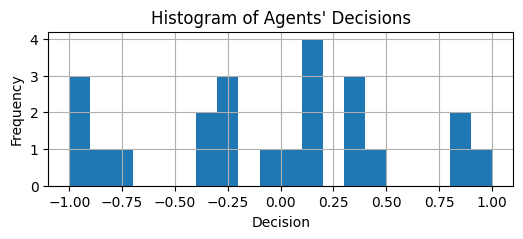

In [27]:
# A small sanity check
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 2))
df['decision'].hist(bins=20)
plt.xlabel('Decision')
plt.ylabel('Frequency')
plt.title('Histogram of Agents\' Decisions')
plt.show()

#### Grab consensus value system and store decisions for each relevant consensus
- Take the consensus files that you've found, ones for preferences and actions
- Also take a note of the HCVA point and the transition point found for that data, now that you have got your synthetic principles
    - Input these to relevant consensus

In [ ]:
#####
# 1.0 = Utilitarian, 1.4 = Transition point, 2.1 = HCVA, 10.0 = Egalitarian
###
relevent_consensuses =  [1.0, 1.4, 2.1, 10.0]
#relevent_consensuses = [round(x * 0.1, 1) for x in range(10, 101)]
relevent_columns = ['p','Rel-Nonrel', 'Nonrel-Rel', 'Rel_div_p', 'Nonrel_div_p', 'Egal-Util', 'Util-Egal']


actions_filename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/results/14-11-results-factor-2.5-5.0.csv"
preference_filename = '/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/results/14-11-results-factor-2.5-5.0-prefs.csv'

final_df_savename = "/home/ia23938/Documents/GitHub/ValueSystemsAggregation/data/ess_example_data/14-11-ess-relevant-consensus.csv"

pref_df = pd.read_csv(preference_filename)
act_df = pd.read_csv(actions_filename)
cons_df = pd.merge(pref_df, act_df, on='p')
cons_df['p'] = cons_df['p'].round(1)

# for each row, find the corresponding Util-Egal and Egal-Util values (where P=1.0 has Util-Egal=1.0 and Egal-Util=0.0, and P=10.0 has Util-Egal=0.0 and Egal-Util=1.0)
for index, row in cons_df.iterrows():
    cons_df.at[index, 'Egal-Util'] = (row['p'] - 1) / 9
    cons_df.at[index, 'Util-Egal'] = 1 - cons_df.at[index, 'Egal-Util']


cons_df


,p,Up_x,Dist1_x,Distl_x,Rel-Rel,Rel-Nonrel,Nonrel-Rel,Nonrel-Nonrel,Up_y,Dist1_y,Distl_y,Rel_div_p,Nonrel_div_p,Rel_div_n,Nonrel_div_n,Egal-Util,Util-Egal
0,1.0,4.278681,0.000000,0.032110,0.0,0.346411,0.653589,0.0,42.671756,0.000000,0.144976,0.010277,0.144976,-0.010277,-0.144976,0.000000,1.000000
1,1.1,3.130946,0.000691,0.060989,0.0,0.346043,0.653957,0.0,29.177997,0.051544,0.286624,-0.014890,0.141869,0.014890,-0.141869,0.011111,0.988889
2,1.2,2.422156,0.001092,0.058305,0.0,0.345798,0.654202,0.0,21.275377,0.173777,0.266839,-0.060019,0.106757,0.060019,-0.106757,0.022222,0.977778
3,1.3,1.955035,0.001220,0.055947,0.0,0.345695,0.654305,0.0,16.311599,0.213457,0.242865,-0.078881,0.088254,0.078881,-0.088254,0.033333,0.966667
4,1.4,1.631161,0.001041,0.053723,0.0,0.345776,0.654224,0.0,13.015446,0.226430,0.224533,-0.089210,0.077451,0.089210,-0.077451,0.044444,0.955556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,9.7,0.310001,0.027084,0.007404,0.0,0.371627,0.628373,0.0,1.354970,0.148015,0.046841,-0.043611,0.007171,0.043611,-0.007171,0.966667,0.033333
88,9.8,0.309425,0.027161,0.007302,0.0,0.371717,0.628283,0.0,1.350486,0.147899,0.046344,-0.043180,0.007178,0.043180,-0.007178,0.977778,0.022222
89,9.9,0.308863,0.027237,0.007202,0.0,0.371806,0.628194,0.0,1.346112,0.147787,0.045857,-0.042756,0.007184,0.042756,-0.007184,0.988889,0.011111
90,10.0,0.308313,0.027311,0.007103,0.0,0.371893,0.628107,0.0,1.341842,0.147677,0.045378,-0.042340,0.007190,0.042340,-0.007190,1.000000,0.000000


In [29]:
final_df = pd.DataFrame()
for consensus in relevent_consensuses:
    filtered_df = cons_df[cons_df['p'] == consensus][relevent_columns]
    filtered_df['decision'] = (filtered_df['Rel_div_p'] * filtered_df['Rel-Nonrel']) + (filtered_df['Nonrel_div_p'] * filtered_df['Nonrel-Rel'])
    final_df = pd.concat([final_df, filtered_df], ignore_index=True)
final_df.to_csv(final_df_savename)
final_df

,p,Rel-Nonrel,Nonrel-Rel,Rel_div_p,Nonrel_div_p,Egal-Util,Util-Egal,decision
0,1.0,0.346411,0.653589,0.010277,0.144976,0.000000,1.000000,0.098315
1,1.4,0.345776,0.654224,-0.089210,0.077451,0.044444,0.955556,0.019824
2,2.1,0.352679,0.647321,-0.113565,0.042727,0.122222,0.877778,-0.012394
3,10.0,0.371893,0.628107,-0.042340,0.007190,1.000000,0.000000,-0.011230


#### Find the difference between each agent and each of the 4 different strategies (only on decision)

For every agent that has a value system that we have just generated, we now compare the agents decision against the different decisions found by each strategy.

In [30]:
agent_df = df
strategy_df = final_df
agent_df['min_distance'] = agent_df.apply(
    lambda row: min(abs(row['decision'] - strategy_decision) for strategy_decision in strategy_df['decision']),
    axis=1
)

agent_df['closest_p'] = agent_df.apply(
    lambda row: strategy_df.loc[(strategy_df['decision'] - row['decision']).abs().idxmin(), 'p'],
    axis=1
)

agent_df

print(agent_df['closest_p'].value_counts())



closest_p
1.0    12
2.1    11
Name: count, dtype: int64


### Value System Comparison
Instead of looking at decisions, instead look at the distance from the consensus value system to the agents individual value systems 

In [31]:
import numpy as np
# Comparing using these values: Rel-Nonrel	Nonrel-Rel	Rel_div_p	Nonrel_div_p

# Function to calculate Euclidean distance
def euclidean_distance(row1, row2, compare_columns):
    return np.sqrt(sum((row1[col] - row2[col]) ** 2 for col in compare_columns))

def chebyshev_distance(row1, row2, compare_columns):
    return max(abs(row1[col] - row2[col]) for col in compare_columns)

def manhattan_distance(row1, row2, compare_columns):
    return sum(abs(row1[col] - row2[col]) for col in compare_columns)


distance_measures = {
    'euclidean': euclidean_distance,
    'chebyshev': chebyshev_distance,
    'manhattan': manhattan_distance
}

In [32]:
from tabulate import tabulate

# Define the columns to compare
compare_columns = ['Rel-Nonrel', 'Nonrel-Rel', 'Rel_div_p', 'Nonrel_div_p']

for measure in distance_measures:
    agent_df[f'closest_p_{measure}'] = agent_df.apply(
        lambda agent_row: strategy_df.loc[
            strategy_df.apply(lambda final_row: distance_measures[measure](agent_row, final_row, compare_columns), axis=1).idxmin()
        ]['p'],
        axis=1
    )

    print(f"closest set according to {measure} distance: ", agent_df[f'closest_p_{measure}'].value_counts())


# Define the strategies and their corresponding p values
strategies = {
    'Utilitarian (1.0)': 1.0,
    'Transition (1.4)': 1.4,
    'HCVA (2.1)': 2.1,
    'Egalitarian (10.0)': 10.0
}

# Create a list to store the table rows
table_rows = []

# Iterate over the strategies and count the number of agents aligned to each strategy for each distance measure
for strategy, p_value in strategies.items():
    row = [strategy]
    row.append(final_df[final_df['p'] == p_value]['decision'].values[0])
    for measure in distance_measures:
        count = agent_df[agent_df[f'closest_p_{measure}'] == p_value].shape[0]
        row.append(count)
    table_rows.append(row)

# Print the table in LaTeX format
latex_table = tabulate(table_rows, headers=['Strategy', 'Decision', 'Agents Aligned (Euclidean)', 'Agents Aligned (Chebyshev)', 'Agents Aligned (Manhattan)'], tablefmt='latex')
print(latex_table)
"""
# Find the closest set of values for each agent
agent_df['closest_set'] = agent_df.apply(
    lambda agent_row: final_df.loc[
        final_df.apply(lambda final_row: euclidean_distance(agent_row, final_row), axis=1).idxmin()
    ].to_dict(),
    axis=1
)

agent_df['closest_set']
closest_p_values = agent_df['closest_set'].apply(lambda x: x['p'])
print("closest set accordingto euclidean distance: ", closest_p_values.value_counts())
"""

closest set according to euclidean distance:  closest_p_euclidean
1.0     10
2.1      8
10.0     5
Name: count, dtype: int64
closest set according to chebyshev distance:  closest_p_chebyshev
10.0    11
1.0      8
2.1      4
Name: count, dtype: int64
closest set according to manhattan distance:  closest_p_manhattan
1.0     11
10.0    11
2.1      1
Name: count, dtype: int64
\begin{tabular}{lrrrr}
\hline
 Strategy           &   Decision &   Agents Aligned (Euclidean) &   Agents Aligned (Chebyshev) &   Agents Aligned (Manhattan) \\
\hline
 Utilitarian (1.0)  &  0.098315  &                           10 &                            8 &                           11 \\
 Transition (1.4)   &  0.0198238 &                            0 &                            0 &                            0 \\
 HCVA (2.1)         & -0.0123937 &                            8 &                            4 &                            1 \\
 Egalitarian (10.0) & -0.0112298 &                            5 &       

'\n# Find the closest set of values for each agent\nagent_df[\'closest_set\'] = agent_df.apply(\n    lambda agent_row: final_df.loc[\n        final_df.apply(lambda final_row: euclidean_distance(agent_row, final_row), axis=1).idxmin()\n    ].to_dict(),\n    axis=1\n)\n\nagent_df[\'closest_set\']\nclosest_p_values = agent_df[\'closest_set\'].apply(lambda x: x[\'p\'])\nprint("closest set accordingto euclidean distance: ", closest_p_values.value_counts())\n'

In [33]:
import numpy as np
# Comparing using these values: Rel-Nonrel	Nonrel-Rel	Rel_div_p	Nonrel_div_p

# Define the columns to compare
compare_columns = ['Rel-Nonrel', 'Nonrel-Rel', 'Rel_div_p', 'Nonrel_div_p', 'Egal-Util', 'Util-Egal']
# Caclulate the principles for the consensus values

for measure in distance_measures:
    agent_df[f'closest_p_{measure}'] = agent_df.apply(
        lambda agent_row: strategy_df.loc[
            strategy_df.apply(lambda final_row: distance_measures[measure](agent_row, final_row, compare_columns), axis=1).idxmin()
        ]['p'],
        axis=1
    )
    print(f"closest set according to {measure} distance: ", agent_df[f'closest_p_{measure}'].value_counts())

# Define the strategies and their corresponding p values
strategies = {
    'Utilitarian (1.0)': 1.0,
    'Transition (1.4)': 1.4,
    'HCVA (2.1)': 2.1,
    'Egalitarian (10.0)': 10.0
}

# Create a list to store the table rows
table_rows = []

# Iterate over the strategies and count the number of agents aligned to each strategy for each distance measure
for strategy, p_value in strategies.items():
    row = [strategy]
    row.append(final_df[final_df['p'] == p_value]['decision'].values[0])
    for measure in distance_measures:
        count = agent_df[agent_df[f'closest_p_{measure}'] == p_value].shape[0]
        row.append(count)
    table_rows.append(row)

# Print the table in LaTeX format
latex_table = tabulate(table_rows, headers=['Strategy', 'Decision', 'Agents Aligned (Euclidean)', 'Agents Aligned (Chebyshev)', 'Agents Aligned (Manhattan)'], tablefmt='latex')
print(latex_table)



closest set according to euclidean distance:  closest_p_euclidean
1.0     10
2.1      7
10.0     6
Name: count, dtype: int64
closest set according to chebyshev distance:  closest_p_chebyshev
1.0     8
2.1     8
10.0    7
Name: count, dtype: int64
closest set according to manhattan distance:  closest_p_manhattan
2.1     13
10.0     6
1.0      4
Name: count, dtype: int64
\begin{tabular}{lrrrr}
\hline
 Strategy           &   Decision &   Agents Aligned (Euclidean) &   Agents Aligned (Chebyshev) &   Agents Aligned (Manhattan) \\
\hline
 Utilitarian (1.0)  &  0.098315  &                           10 &                            8 &                            4 \\
 Transition (1.4)   &  0.0198238 &                            0 &                            0 &                            0 \\
 HCVA (2.1)         & -0.0123937 &                            7 &                            8 &                           13 \\
 Egalitarian (10.0) & -0.0112298 &                            6 &          